In [34]:
%matplotlib inline
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

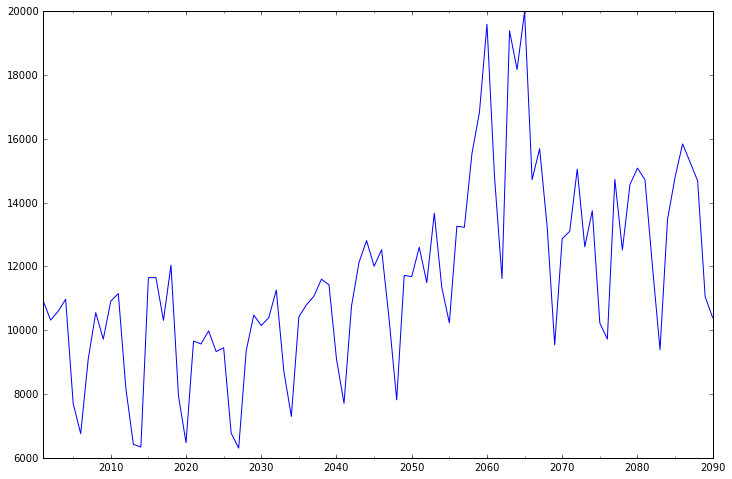

In [35]:
dta=[10930,10318,10595,10972,7706,6756,9092,10551,9722,10913,11151,8186,6422, 
6337,11649,11652,10310,12043,7937,6476,9662,9570,9981,9331,9449,6773,6304,9355, 
10477,10148,10395,11261,8713,7299,10424,10795,11069,11602,11427,9095,7707,10767, 
12136,12812,12006,12528,10329,7818,11719,11683,12603,11495,13670,11337,10232, 
13261,13230,15535,16837,19598,14823,11622,19391,18177,19994,14723,15694,13248, 
9543,12872,13101,15053,12619,13749,10228,9725,14729,12518,14564,15085,14722, 
11999,9390,13481,14795,15845,15271,14686,11054,10395]
dta=pd.Series(dta)
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('2001','2090'))

dta.plot(figsize=(12,8))

In [36]:
#时间序列的差分d， 以下为判断差分数目的程序，根据图像选择一阶差分。
#fig = plt.figure(figsize=(12,8))
#ax1= fig.add_subplot(111)
#diff1 = dta.diff(1)
#diff1.plot(ax=ax1)

In [37]:
#fig = plt.figure(figsize=(12,8))
#ax2= fig.add_subplot(111)
#diff2 = dta.diff(2)
#diff2.plot(ax=ax2)

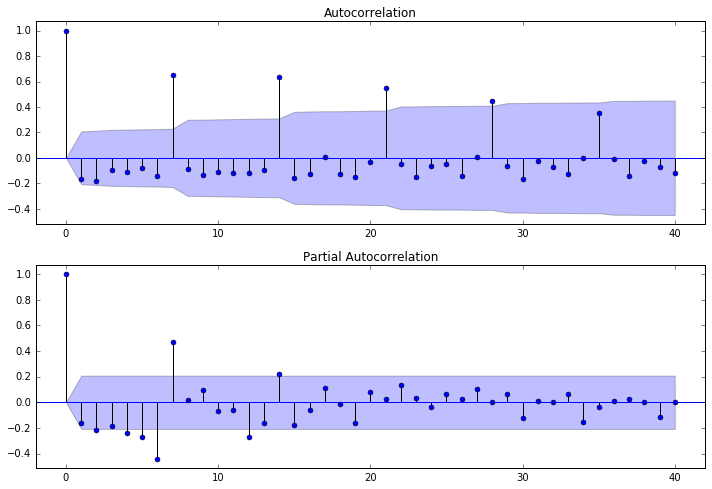

In [38]:
dta= dta.diff(1)#我们已经知道要使用一阶差分的时间序列，之前判断差分的程序可以注释掉
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta[1:],lags=40,ax=ax2)


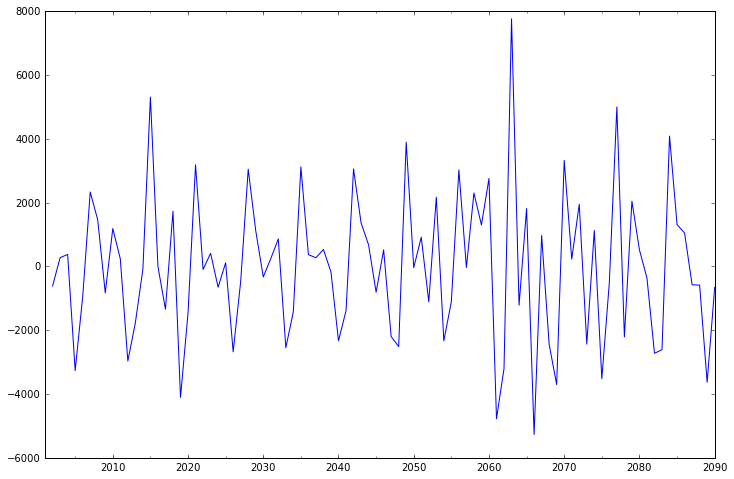

In [39]:
dta.plot(figsize=(12,8))

In [40]:
arma_mod20 = sm.tsa.ARMA(dta[1:],(7,0)).fit()
print(arma_mod20.aic,arma_mod20.bic,arma_mod20.hqic)
arma_mod30 = sm.tsa.ARMA(dta[1:],(0,1)).fit()
print(arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic)
arma_mod40 = sm.tsa.ARMA(dta[1:],(7,1)).fit()
print(arma_mod40.aic,arma_mod40.bic,arma_mod40.hqic)
arma_mod50 = sm.tsa.ARMA(dta[1:],(8,0)).fit()
print(arma_mod50.aic,arma_mod50.bic,arma_mod50.hqic)

(1579.7025548242245, 1602.1002821518139, 1588.7304359562818)
(1632.3203731479534, 1639.7862822571499, 1635.3296668586393)
(1581.0916055590465, 1605.9779692563679, 1591.1225845946658)
(1581.3957835803142, 1606.2821472776357, 1591.4267626159335)


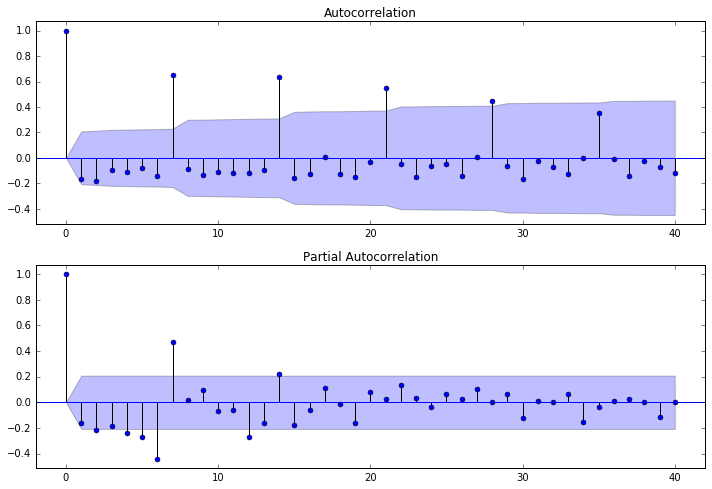

In [41]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta[1:].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta[1:], lags=40, ax=ax2)

2090-12-31   -1236.120056
2091-12-31    3548.966283
2092-12-31    1236.651176
2093-12-31     649.921473
2094-12-31    -530.543617
2095-12-31    -611.713664
2096-12-31   -2290.234037
2097-12-31    -726.578339
2098-12-31    2740.808266
2099-12-31     952.963000
2100-12-31     277.186865
Freq: A-DEC, dtype: float64


/Users/holazhai/anaconda/lib/python2.7/site-packages/statsmodels/base/data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


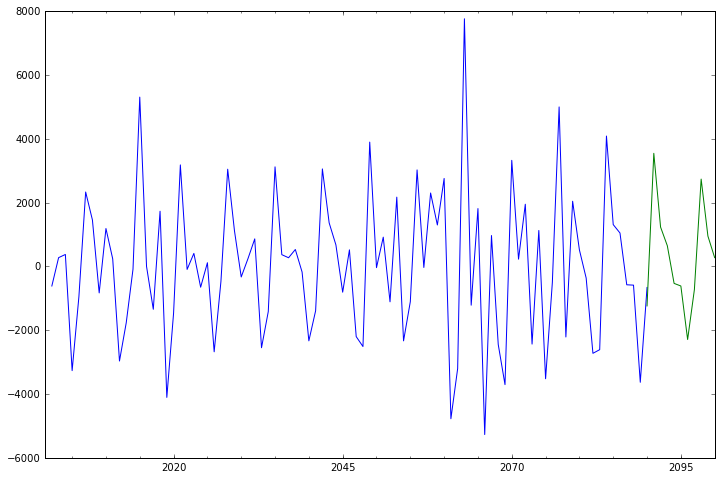

In [42]:
predict_sunspots = arma_mod20.predict('2090', '2100', dynamic=True)
print(predict_sunspots)
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.ix['2001':].plot(ax=ax)
predict_sunspots.plot(ax=ax)